In [1]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.utils.validation import column_or_1d

In [2]:
CSV_PATH = "complete-frame.csv"

frame = pd.read_csv(CSV_PATH, sep=",")

columns = [frame.mutation,frame.no_mutations, frame.line_coverage, frame.isAssertionRoulette, frame.isEagerTest, frame.isLazyTest,
frame.isMysteryGuest, frame.isSensitiveEquality, frame.isResourceOptimism, frame.isForTestersOnly,
frame.isIndirectTesting, frame.LOC_prod, frame.HALSTEAD_prod, frame.RFC_prod, frame.CBO_prod, frame.MPC_prod, frame.IFC_prod, frame.DAC_prod,frame.DAC2_prod, frame.LCOM1_prod, frame.LCOM2_prod,
frame.LCOM3_prod, frame.LCOM4_prod, frame.CONNECTIVITY_prod, frame.LCOM5_prod, frame.COH_prod, frame.TCC_prod,
frame.LCC_prod, frame.ICH_prod, frame.WMC_prod, frame.NOA_prod, frame.NOPA_prod, frame.NOP_prod,
frame.McCABE_prod, frame.BUSWEIMER_prod, frame.LOC_test, frame.HALSTEAD_test, frame.RFC_test, frame.CBO_test,
frame.MPC_test, frame.IFC_test, frame.DAC_test, frame.DAC2_test, frame.LCOM1_test, frame.LCOM2_test,
frame.LCOM3_test, frame.LCOM4_test, frame.CONNECTIVITY_test, frame.LCOM5_test, frame.COH_test, frame.TCC_test,
frame.LCC_test, frame.ICH_test, frame.WMC_test, frame.NOA_test, frame.NOPA_test, frame.NOP_test, frame.McCABE_test,
frame.BUSWEIMER_test, frame.csm_CDSBP, frame.csm_CC, frame.csm_FD, frame.csm_Blob, frame.csm_SC, frame.csm_MC,
frame.csm_LM, frame.csm_FE, frame.prod_readability, frame.test_readability]
    
frame = pd.concat(columns, axis = 1)

x = pd.concat([frame.no_mutations #, frame.line_coverage,
               ,frame.isAssertionRoulette, frame.isEagerTest, frame.isLazyTest,
frame.isMysteryGuest, frame.isSensitiveEquality, frame.isResourceOptimism, frame.isForTestersOnly,
frame.isIndirectTesting, frame.LOC_prod, frame.HALSTEAD_prod, frame.RFC_prod, frame.CBO_prod, frame.MPC_prod, frame.IFC_prod, frame.DAC_prod,frame.DAC2_prod, frame.LCOM1_prod, frame.LCOM2_prod,
frame.LCOM3_prod, frame.LCOM4_prod, frame.CONNECTIVITY_prod, frame.LCOM5_prod, frame.COH_prod, frame.TCC_prod,
frame.LCC_prod, frame.ICH_prod, frame.WMC_prod, frame.NOA_prod, frame.NOPA_prod, frame.NOP_prod,
frame.McCABE_prod, frame.BUSWEIMER_prod, frame.LOC_test, frame.HALSTEAD_test, frame.RFC_test, frame.CBO_test,
frame.MPC_test, frame.IFC_test, frame.DAC_test, frame.DAC2_test, frame.LCOM1_test, frame.LCOM2_test,
frame.LCOM3_test, frame.LCOM4_test, frame.CONNECTIVITY_test, frame.LCOM5_test, frame.COH_test, frame.TCC_test,
frame.LCC_test, frame.ICH_test, frame.WMC_test, frame.NOA_test, frame.NOPA_test, frame.NOP_test, frame.McCABE_test,
frame.BUSWEIMER_test, frame.csm_CDSBP, frame.csm_CC, frame.csm_FD, frame.csm_Blob, frame.csm_SC, frame.csm_MC,
frame.csm_LM, frame.csm_FE, frame.prod_readability, frame.test_readability], axis = 1)

y = pd.concat([frame.mutation], axis = 1)

In [3]:
frame.head()

,mutation,no_mutations,line_coverage,isAssertionRoulette,isEagerTest,isLazyTest,isMysteryGuest,isSensitiveEquality,isResourceOptimism,isForTestersOnly,...,csm_CDSBP,csm_CC,csm_FD,csm_Blob,csm_SC,csm_MC,csm_LM,csm_FE,prod_readability,test_readability
0,0.861111,36,0.928571,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.770906,0.303963
1,0.714286,28,0.666667,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.849132,0.805300
2,0.972973,74,0.965517,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0.654370,0.447056
3,1.000000,15,0.857143,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.721790,0.629857
4,0.835165,728,0.928339,1,1,0,0,1,0,0,...,0,1,0,1,1,1,0,1,0.709265,0.585000


In [4]:
print(frame.shape)

(2411, 69)


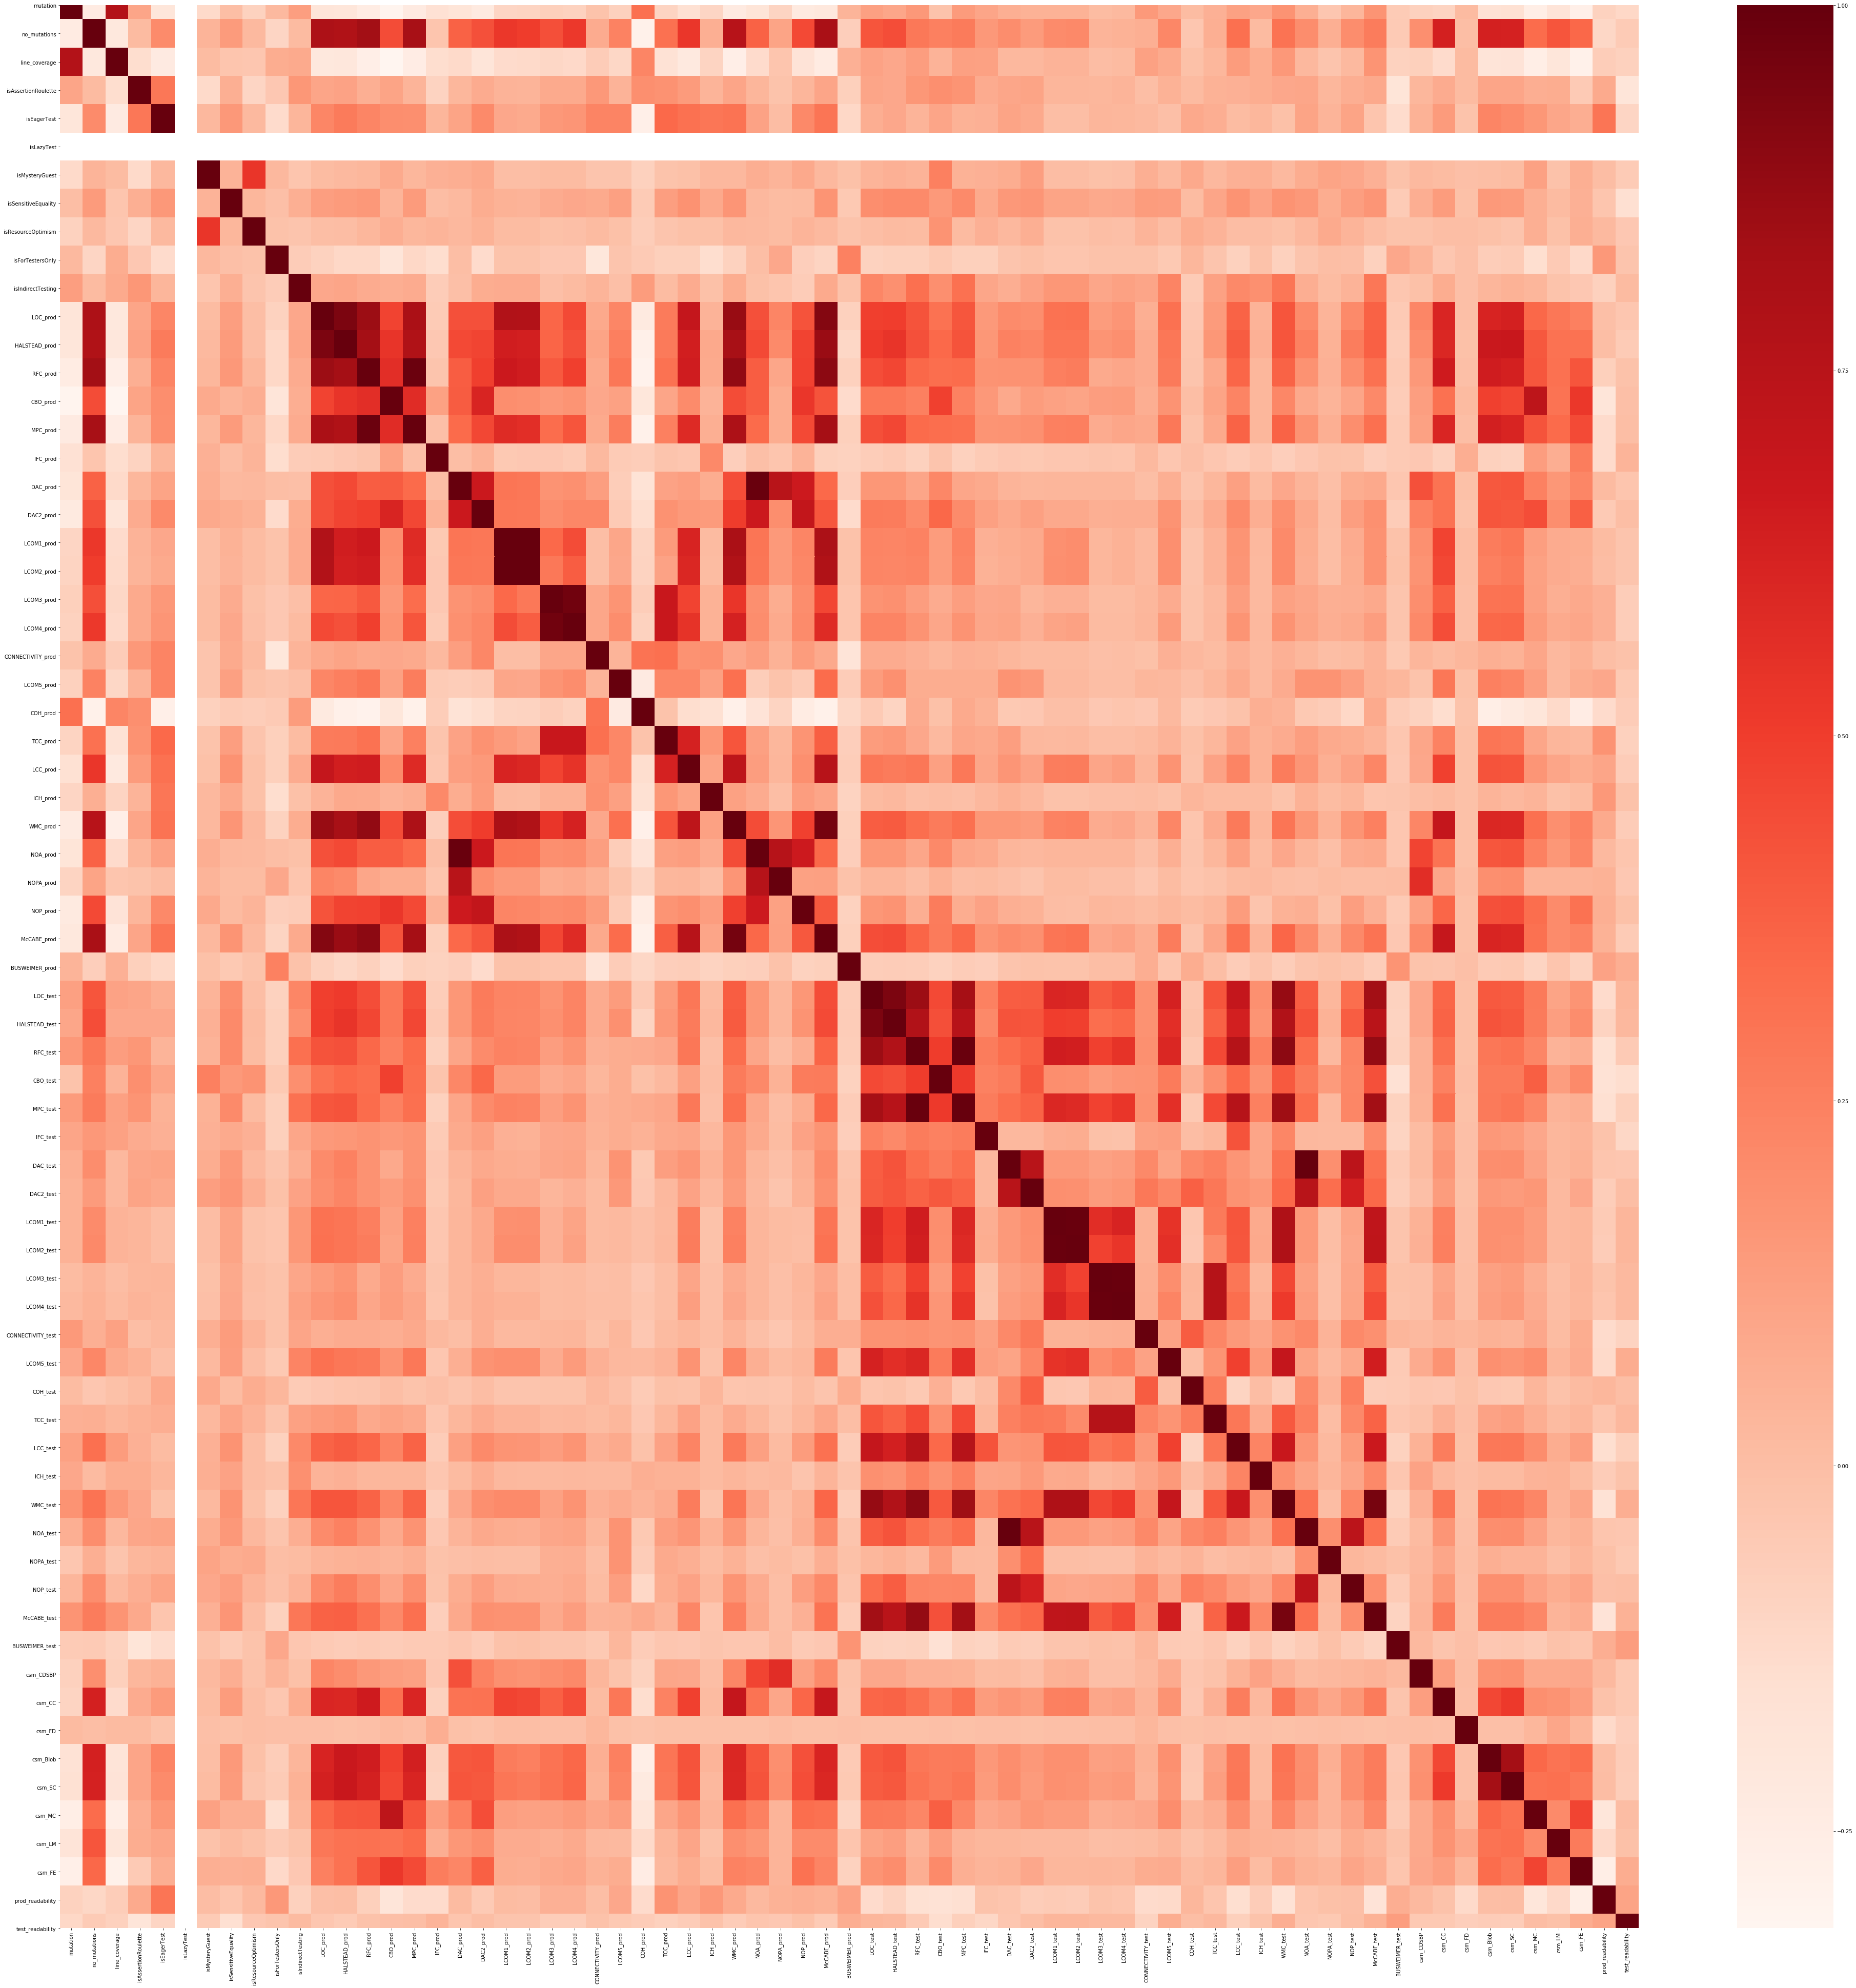

In [5]:
#Using Pearson Correlation
plt.figure(figsize=(69,69))
cor = frame.corr()
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.show()

In [6]:
#Correlation with output variable
cor_target = abs(cor["mutation"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

mutation               1.000000
no_mutations           0.236459
line_coverage          0.770764
isAssertionRoulette    0.100989
isEagerTest            0.193403
isMysteryGuest         0.125431
isIndirectTesting      0.129301
LOC_prod               0.189340
HALSTEAD_prod          0.194846
RFC_prod               0.240942
CBO_prod               0.302009
MPC_prod               0.230269
IFC_prod               0.160827
DAC_prod               0.184230
DAC2_prod              0.226796
LCOM1_prod             0.104320
LCOM2_prod             0.100147
COH_prod               0.319687
LCC_prod               0.152926
ICH_prod               0.102216
WMC_prod               0.233875
NOA_prod               0.187719
NOP_prod               0.229017
McCABE_prod            0.210527
LOC_test               0.123947
RFC_test               0.153217
MPC_test               0.144029
IFC_test               0.102842
CONNECTIVITY_test      0.147904
LCC_test               0.119980
WMC_test               0.173300
McCABE_t

In [7]:
x = x.fillna(0)
y = column_or_1d(y, warn=False)
    
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)
#Transforming data using RFE
X_rfe = rfe.fit_transform(x,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False False False False  True False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False  True
 False False  True  True  True  True  True]
[43  5  4 58  1 21 29  8  2 53 55 36 14 37 19 16 18 47 46 54 45  7 35  1
 39 12 44 26 15 24 20 56  1 51 57 33 28 32 38 42 22 50 48 49 52  3 40 30
 17 31 10 23 41 27 11 34  1 25  6  1  9 13  1  1  1  1  1]


In [8]:
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 12
Score with 12 features: 0.148118


In [9]:
cols = list(x.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 12)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(x,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['isMysteryGuest', 'isIndirectTesting', 'COH_prod', 'BUSWEIMER_prod',
       'CONNECTIVITY_test', 'BUSWEIMER_test', 'csm_FD', 'csm_MC', 'csm_LM',
       'csm_FE', 'prod_readability', 'test_readability'],
      dtype='object')


In [11]:
#Join CSVs

CSV_PATH = "complete-frame.csv"

import csv
with open(CSV_PATH, newline='') as csvfile:
    

project,module,commit,path_test,test_name,path_src,class_name,mutation,no_mutations,line_coverage,isAssertionRoulette,isEagerTest,isLazyTest,isMysteryGuest,isSensitiveEquality,isResourceOptimism,isForTestersOnly,isIndirectTesting,LOC_prod,HALSTEAD_prod,RFC_prod,CBO_prod,MPC_prod,IFC_prod,DAC_prod,DAC2_prod,LCOM1_prod,LCOM2_prod,LCOM3_prod,LCOM4_prod,CONNECTIVITY_prod,LCOM5_prod,COH_prod,TCC_prod,LCC_prod,ICH_prod,WMC_prod,NOA_prod,NOPA_prod,NOP_prod,McCABE_prod,BUSWEIMER_prod,LOC_test,HALSTEAD_test,RFC_test,CBO_test,MPC_test,IFC_test,DAC_test,DAC2_test,LCOM1_test,LCOM2_test,LCOM3_test,LCOM4_test,CONNECTIVITY_test,LCOM5_test,COH_test,TCC_test,LCC_test,ICH_test,WMC_test,NOA_test,NOPA_test,NOP_test,McCABE_test,BUSWEIMER_test,csm_CDSBP,csm_CC,csm_FD,csm_Blob,csm_SC,csm_MC,csm_LM,csm_FE,prod_readability,test_readability
commons-collections,,483cbbbf5a8b3c14edf3e6563e8f8ba380966d47,/home/ubuntu/scripts_mutation/projects/commons-collections/src/test/java/org/apache/commons/collections4/Enumer

RxJava,,be0353cc6334fbb60a285f2f4f4ba88150f099e6,/home/ubuntu/scripts_mutation/projects/RxJava/src/test/java/io/reactivex/internal/operators/single/SingleCreateTest.java,io.reactivex.internal.operators.single.SingleCreateTest,/home/ubuntu/scripts_mutation/projects/RxJava/src/main/java/io/reactivex/internal/operators/single/SingleCreate.java,io.reactivex.internal.operators.single.SingleCreate,0.833333333,6,1,1,0,0,0,1,0,0,0,131,713.443113,6,7,4,4,1,1,0,0,1,1,0,0,1,0,0,0,2,1,0,0,4,0,320,754.6259582,166,9,125,3,0,0,820,820,0,168,0.164102564,0,0,4,14,1.1875,41,0,0,0,80,0,0,0,0,0,0,0,0,0,0.671851089,0.724371258
RxJava,,be0353cc6334fbb60a285f2f4f4ba88150f099e6,/home/ubuntu/scripts_mutation/projects/RxJava/src/test/java/io/reactivex/internal/operators/single/SingleTimeoutTest.java,io.reactivex.internal.operators.single.SingleTimeoutTest,/home/ubuntu/scripts_mutation/projects/RxJava/src/main/java/io/reactivex/internal/operators/single/SingleTimeout.java,io.reactivex.internal.operators.single.S